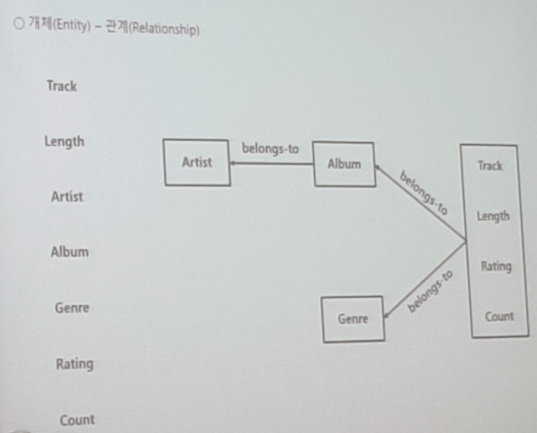

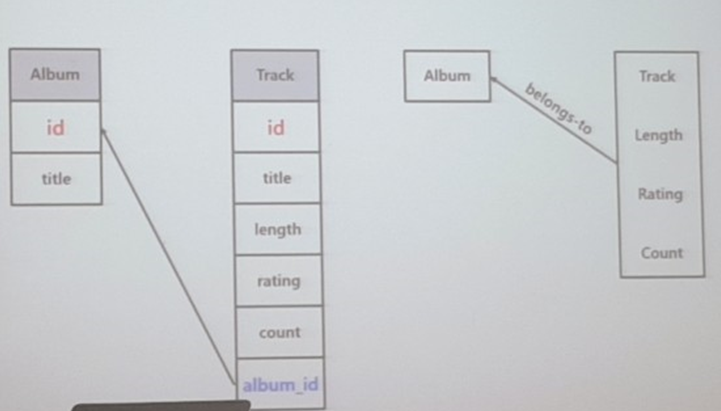

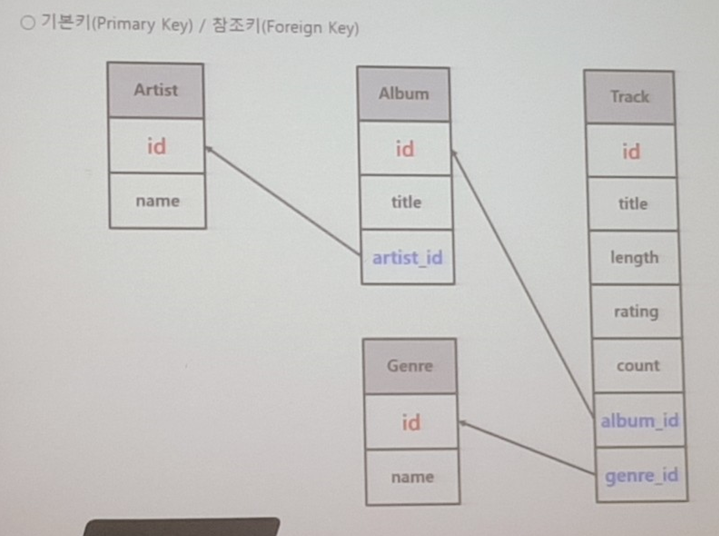

In [2]:
import sqlite3

In [50]:
conn = sqlite3.connect(':memory:')
cur = conn.cursor()

In [51]:
conn = sqlite3.connect('.db')
print("Opened database successfully")
cur =conn.cursor()

Opened database successfully


In [52]:
# Artist
cur.execute('CREATE TABLE Artist(id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE, name TEXT)')

# Genre
cur.execute('CREATE TABLE Genre(id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE, name TEXT)')

# Album
cur.execute('CREATE TABLE Album(id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE, name TEXT, title TEXT, artist_id INTEGER)')

OperationalError: table Artist already exists

In [53]:
cur.execute('CREATE TABLE Track(id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE, title TEXT, length INTEGER, rating INTEGER, count INTEGER, album_id INTEGER, genre_id INTEGER)')

OperationalError: table Track already exists

In [54]:
cur.execute('insert into Artist (name) values ("Led ZEPPLIN")')

In [55]:
cur.execute('insert into Artist (name) values ("AC/DC")')

In [56]:
cur.execute('insert into Genre (name) values ("Rock")')

In [57]:
cur.execute('insert into Genre (name) values ("Metal")')

In [58]:
cur.execute('insert into Genre (name) values ("Metal")')

In [63]:
"""
    INSERT INTO album(name, artist_id)
    VALUES(:album,
        (SELECT id
        FROM artist
        WHERE name=:artist))
""", {"album":"앨범이름", "artist":"가수이름"}
# 서로 다른 2개의 sql 문을 하나로 합쳐서 본 것

('\n    INSERT INTO album(name, artist_id)\n    VALUES(:album,\n        (SELECT id\n        FROM artist\n        WHERE name=:artist))\n',
 {'album': '앨범이름', 'artist': '가수이름'})

In [60]:
conn.commit()

In [66]:
cur.execute("""
    INSERT INTO album(title, artist_id)
    VALUES(:album,
        (SELECT id
        FROM artist
        WHERE name=:artist))
""", {"album":"앨범이름", "artist":"가수이름"})

In [35]:
conn.close()

In [67]:
conn.commit()

In [75]:
cur.execute('INSERT INTO album (title, artist_id) VALUES("Who made Who","2")')

In [76]:
cur.execute('INSERT INTO album (title, artist_id) VALUES("IV","1")')

In [77]:
cur.execute('INSERT INTO Track(title, rating, length, count, album_id, genre_id) VALUES ("BLACK DOG", 5, 297, 0, 2, 1)')

In [79]:
conn.commit()

In [83]:
cur.executescript("""
        INSERT INTO Track (title, rating, length, count, album_id, genre_id) VALUES ('Stairway', 4, 321,0,2,1);
        INSERT INTO Track (title, rating, length, count, album_id, genre_id) VALUES ('About to Rock', 5, 302,0,1,2);
        INSERT INTO Track (title, rating, length, count, album_id, genre_id) VALUES ('who made WHO', 5, 227,0,2,2);
        
        """);

In [81]:
conn.commit()

In [94]:
cur.execute("select Album.title, Artist.name from Album join Artist on Album.artist_id = Artist.id")

In [95]:
cur.execute("select Track.title, Genre.name from Track join Genre on Track.album_id = Genre.id")

In [96]:
conn.commit()

In [98]:
cur.execute("select Track.title, Artist.name, Album.title, Genre.name from Track join Artist join Album join Genre on Track.album_id = Album.id and Track.genre_id = Genre.id and Album.artist_id = Artist.id")

In [99]:
conn.commit()